In [1]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [31]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
columns_m = inspector.get_columns('Measurement')
for column in columns_m:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
columns_s = inspector.get_columns('station')
for column_s in columns_s:
    print(column_s["name"], column_s["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [9]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
session = Session(engine)

In [34]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest_date)

date = dt.datetime(2016, 8, 22)

results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > date).all()

results







('2017-08-23',)


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [12]:
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df = df.sort_values(by="date")
df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


Text(0, 0.5, 'Inches')

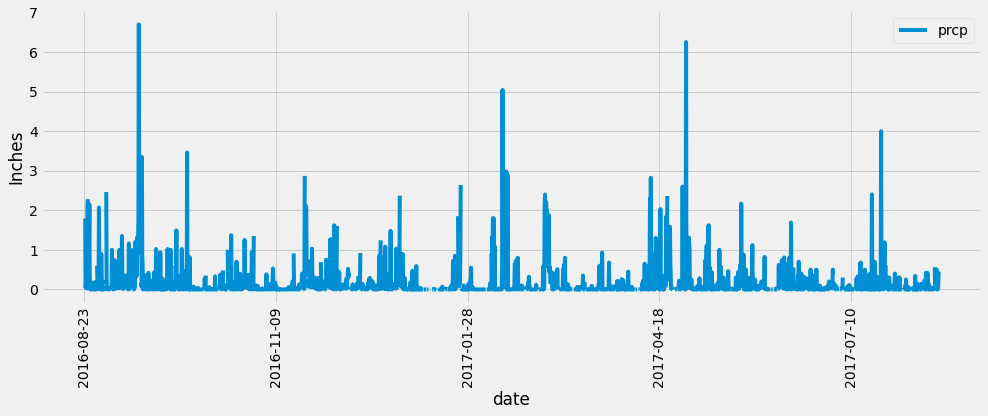

In [13]:
df.plot(figsize=(15, 5))
plt.xticks(rotation='vertical')
plt.ylabel('Inches')

In [14]:
summary_statistic = df["prcp"].describe()
summary_statistic

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [15]:
session.query(Station.station).count()

9

In [16]:
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
most_active_station = station_count[0][0]
most_active_station

'USC00519281'

In [18]:
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
query = session.query(*sel).\
    filter(Measurement.station == most_active_station).\
    group_by(Measurement.station).\
    all()
query_df = pd.DataFrame(query, columns=['station_id', 'min_temp', 'max_temp', 'avg_temp'])
query_df.set_index('station_id', inplace=True)
query_df


,min_temp,max_temp,avg_temp
station_id,,,
USC00519281,54.0,85.0,71.663781


In [19]:
highest_temp_station = session.query(Measurement.tobs).filter(Measurement.date > date).filter(Measurement.station == most_active_station).all()


Text(0.5, 0, 'Temperature')

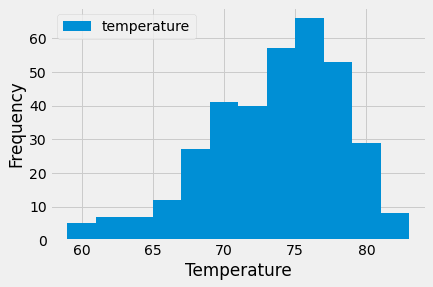

In [20]:
df_2 = pd.DataFrame(highest_temp_station, columns=['temperature'])
df_2.plot.hist(bins=12)
# plt.xticks(rotation='vertical')
plt.xlabel('Temperature')